# Lesson 14: Advanced Statistics - Demo Reference

This notebook demonstrates key concepts in advanced statistics including hypothesis testing, confidence intervals, and statistical inference.

## Setup

Import the required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Example 1: Population Distribution

Generate a large sample to represent our population and visualize its characteristics.

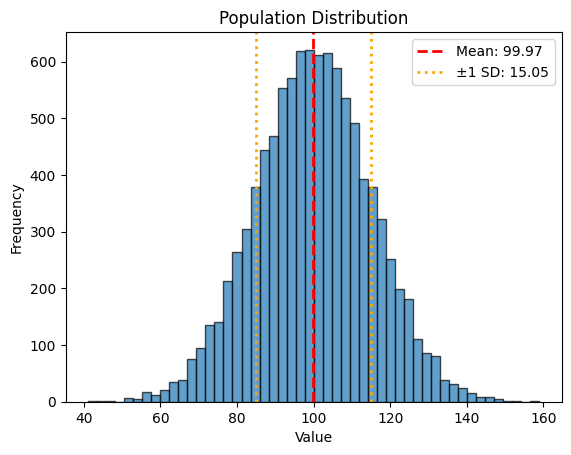

In [2]:
# Generate population data
np.random.seed(42)
population = np.random.normal(loc=100, scale=15, size=10000)

# Calculate population parameters
pop_mean = population.mean()
pop_std = population.std()

# Plot population distribution
plt.title('Population Distribution')
plt.hist(population, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(pop_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {pop_mean:.2f}')
plt.axvline(pop_mean - pop_std, color='orange', linestyle=':', linewidth=2, label=f'±1 SD: {pop_std:.2f}')
plt.axvline(pop_mean + pop_std, color='orange', linestyle=':', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Example 2: Confidence Interval for Sample Mean

Draw a sample from the population and construct a 95% confidence interval around the sample mean.

In [3]:
# Draw a sample of 100 data points
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)

# Calculate sample statistics
sample_mean = sample.mean()
sample_std = sample.std(ddof=1)
sample_se = sample_std / np.sqrt(sample_size)

print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample standard deviation: {sample_std:.2f}")
print(f"Standard error: {sample_se:.2f}")

Sample mean: 101.75
Sample standard deviation: 16.06
Standard error: 1.61


In [4]:
# Construct 95% confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
df = sample_size - 1

# Use t-distribution for confidence interval
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_of_error = t_critical * sample_se

ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"\n95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")
print(f"Margin of error: ±{margin_of_error:.2f}")
print(f"\nPopulation mean ({pop_mean:.2f}) is {'inside' if ci_lower <= pop_mean <= ci_upper else 'outside'} the CI")


95% Confidence Interval: [98.57, 104.94]
Margin of error: ±3.19

Population mean (99.97) is inside the CI


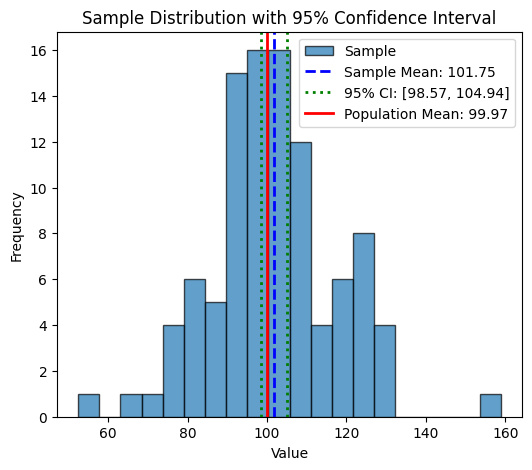

In [5]:
# Visualize the confidence interval
plt.figure(figsize=(6, 5))
plt.hist(sample, bins=20, edgecolor='black', alpha=0.7, label='Sample')
plt.axvline(sample_mean, color='blue', linestyle='--', linewidth=2, label=f'Sample Mean: {sample_mean:.2f}')
plt.axvline(ci_lower, color='green', linestyle=':', linewidth=2, label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
plt.axvline(ci_upper, color='green', linestyle=':', linewidth=2)
plt.axvline(pop_mean, color='red', linestyle='-', linewidth=2, label=f'Population Mean: {pop_mean:.2f}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sample Distribution with 95% Confidence Interval')
plt.legend()
plt.show()

In [ ]:
# Draw 100 samples and calculate confidence intervals
num_samples = 100
sample_size = 100
confidence_level = 0.95
alpha = 1 - confidence_level

# Store results
ci_results = []
contains_pop_mean = []

for i in range(num_samples):

    # Draw sample
    sample = np.random.choice(population, size=sample_size, replace=False)
    
    # Calculate statistics
    sample_mean = sample.mean()
    sample_std = sample.std(ddof=1)
    sample_se = sample_std / np.sqrt(sample_size)
    
    # Calculate confidence interval
    df = sample_size - 1
    t_critical = stats.t.ppf(1 - alpha/2, df)
    margin_of_error = t_critical * sample_se
    
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    
    # Check if CI contains population mean
    contains = ci_lower <= pop_mean <= ci_upper
    
    ci_results.append((ci_lower, ci_upper, sample_mean))
    contains_pop_mean.append(contains)

# Calculate coverage
coverage = sum(contains_pop_mean) / num_samples * 100

print(f"Number of CIs containing population mean: {sum(contains_pop_mean)}/{num_samples}")
print(f"Coverage: {coverage:.1f}%")
print(f"Expected coverage: {confidence_level*100:.0f}%")

Number of CIs containing population mean: 96/100
Coverage: 96.0%
Expected coverage: 95%


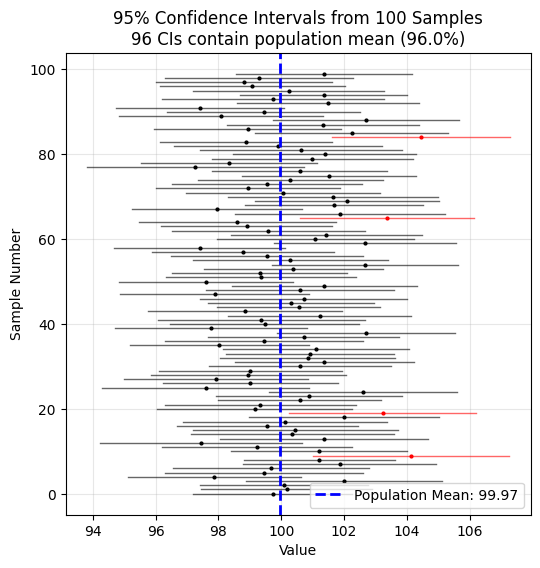

In [7]:
# Visualize the confidence intervals
plt.figure(figsize=(6, 6))

for i, (ci_lower, ci_upper, sample_mean) in enumerate(ci_results):
    color = 'black' if contains_pop_mean[i] else 'red'
    plt.plot([ci_lower, ci_upper], [i, i], color=color, linewidth=1, alpha=0.6)
    plt.plot(sample_mean, i, 'o', color=color, markersize=2)

plt.axvline(pop_mean, color='blue', linestyle='--', linewidth=2, label=f'Population Mean: {pop_mean:.2f}')
plt.xlabel('Value')
plt.ylabel('Sample Number')
plt.title(f'95% Confidence Intervals from {num_samples} Samples\n{sum(contains_pop_mean)} CIs contain population mean ({coverage:.1f}%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## Example 4: Comparing Two Samples

Draw two random samples and compare their distributions using boxplots.

In [8]:
# Draw two samples of size 50
sample_size = 50
sample1 = np.random.choice(population, size=sample_size, replace=False)
sample2 = np.random.choice(population, size=sample_size, replace=False)

# Calculate statistics for both samples
mean1 = sample1.mean()
mean2 = sample2.mean()
std1 = sample1.std(ddof=1)
std2 = sample2.std(ddof=1)

print(f"Sample 1 - Mean: {mean1:.2f}, SD: {std1:.2f}")
print(f"Sample 2 - Mean: {mean2:.2f}, SD: {std2:.2f}")
print(f"Difference in means: {abs(mean1 - mean2):.2f}")

Sample 1 - Mean: 96.97, SD: 15.35
Sample 2 - Mean: 101.71, SD: 13.46
Difference in means: 4.75


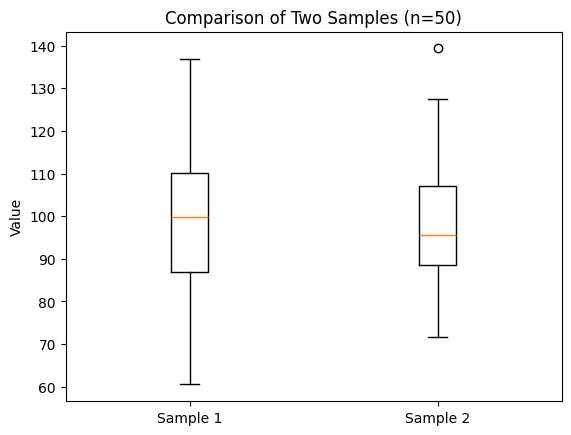

In [15]:
# Create boxplot comparison
plt.title('Comparison of Two Samples (n=50)')
plt.boxplot([sample1, sample2], tick_labels=['Sample 1', 'Sample 2'])
plt.ylabel('Value')
plt.show()

**Null hypothesis:** The means of the two samples are equal.
**Alternative hypothesis:** The means of the two samples are different.

In [10]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"\nIndependent Samples t-test:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret results
alpha = 0.05


Independent Samples t-test:
t-statistic: -1.6440
p-value: 0.1034


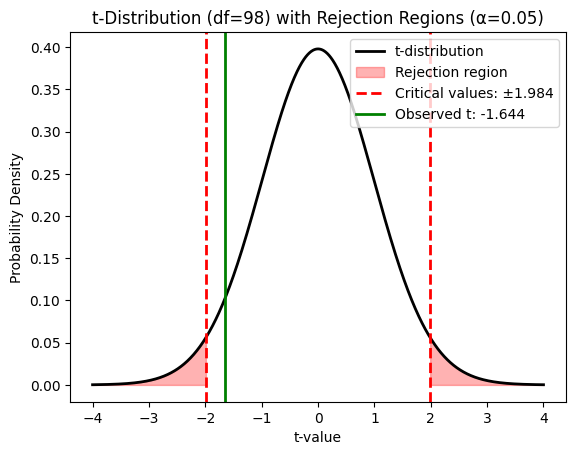

In [11]:
# Visualize t-distribution with rejection regions
df = 2 * sample_size - 2  # Degrees of freedom for two-sample t-test
t_critical = stats.t.ppf(1 - alpha/2, df)

# Generate t-distribution
t_values = np.linspace(-4, 4, 1000)
t_pdf = stats.t.pdf(t_values, df)

plt.title(f't-Distribution (df={df}) with Rejection Regions (α={alpha})')
plt.plot(t_values, t_pdf, color='black', linewidth=2, label='t-distribution')

# Shade rejection regions
rejection_left = t_values[t_values <= -t_critical]
rejection_right = t_values[t_values >= t_critical]
plt.fill_between(rejection_left, stats.t.pdf(rejection_left, df), alpha=0.3, color='red', label='Rejection region')
plt.fill_between(rejection_right, stats.t.pdf(rejection_right, df), alpha=0.3, color='red')

# Mark critical values
plt.axvline(-t_critical, color='red', linestyle='--', linewidth=2, label=f'Critical values: ±{t_critical:.3f}')
plt.axvline(t_critical, color='red', linestyle='--', linewidth=2)

# Mark observed t-statistic
plt.axvline(t_statistic, color='green', linestyle='-', linewidth=2, label=f'Observed t: {t_statistic:.3f}')

plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title(f't-Distribution (df={df}) with Rejection Regions (α={alpha})')
plt.legend()
plt.show()

- Accept the null hypothesis if p-value is greater than alpha.
- Reject the null hypothesis if p-value is less than alpha.

If we use an 'alpha' (significance level) of 0.05, we will incorrectly reject the null hypothesis (think the samples are from different populations) on average 5% of the time.

## Example 5: Interpreting significance

Repeat the sampling and t-test process 100 times to see how often we reject the null hypothesis.

In [12]:
# Repeat sampling and t-test 100 times
num_tests = 100
sample_size = 50
alpha = 0.05

rejections = []
p_values = []
t_statistics = []

for i in range(num_tests):

    # Draw two samples from the same population
    sample1 = np.random.choice(population, size=sample_size, replace=False)
    sample2 = np.random.choice(population, size=sample_size, replace=False)
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)
    t_statistics.append(t_statistic)
    p_values.append(p_value)
    
    # Check if null hypothesis is rejected
    reject = p_value < alpha
    rejections.append(reject)

# Count results
num_rejections = sum(rejections)
num_acceptances = num_tests - num_rejections

print(f"Results from {num_tests} t-tests:")
print(f"Null hypothesis rejected: {num_rejections} times ({num_rejections/num_tests*100:.1f}%)")
print(f"Null hypothesis accepted: {num_acceptances} times ({num_acceptances/num_tests*100:.1f}%)")
print(f"\nExpected rejection rate (Type I error rate): {alpha*100:.0f}%")

Results from 100 t-tests:
Null hypothesis rejected: 6 times (6.0%)
Null hypothesis accepted: 94 times (94.0%)

Expected rejection rate (Type I error rate): 5%


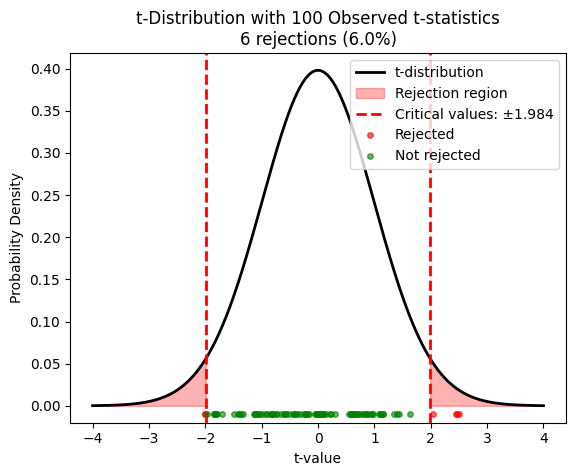

In [13]:
# Visualize t-distribution with all t-statistics
df = 2 * sample_size - 2
t_critical = stats.t.ppf(1 - alpha/2, df)

# Generate t-distribution
t_values = np.linspace(-4, 4, 1000)
t_pdf = stats.t.pdf(t_values, df)

plt.plot(t_values, t_pdf, color='black', linewidth=2, label='t-distribution')

# Shade rejection regions
rejection_left = t_values[t_values <= -t_critical]
rejection_right = t_values[t_values >= t_critical]
plt.fill_between(rejection_left, stats.t.pdf(rejection_left, df), alpha=0.3, color='red', label='Rejection region')
plt.fill_between(rejection_right, stats.t.pdf(rejection_right, df), alpha=0.3, color='red')

# Mark critical values
plt.axvline(-t_critical, color='red', linestyle='--', linewidth=2, label=f'Critical values: ±{t_critical:.3f}')
plt.axvline(t_critical, color='red', linestyle='--', linewidth=2)

# Plot all t-statistics as dots near x-axis
y_position = -0.01  # Position dots slightly below x-axis

for t_stat, reject in zip(t_statistics, rejections):
    color = 'red' if reject else 'green'
    plt.plot(t_stat, y_position, 'o', color=color, markersize=4, alpha=0.6)

# Add dummy points for legend
plt.plot([], [], 'ro', markersize=4, alpha=0.6, label='Rejected')
plt.plot([], [], 'go', markersize=4, alpha=0.6, label='Not rejected')

plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title(f't-Distribution with {num_tests} Observed t-statistics\n{num_rejections} rejections ({num_rejections/num_tests*100:.1f}%)')
plt.legend()
plt.ylim(bottom=-0.02)
plt.show()

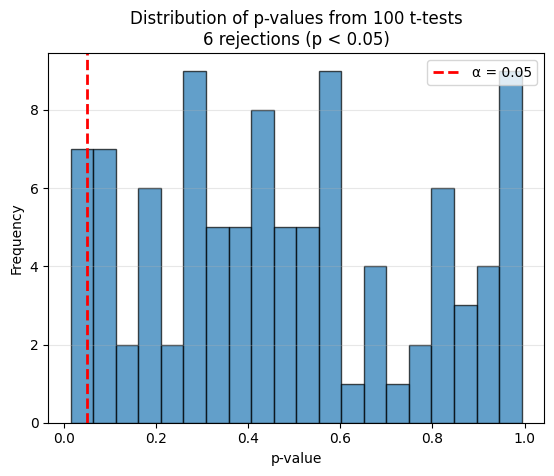

In [14]:
# Visualize the distribution of p-values
plt.hist(p_values, bins=20, edgecolor='black', alpha=0.7)
plt.axvline(alpha, color='red', linestyle='--', linewidth=2, label=f'α = {alpha}')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title(f'Distribution of p-values from {num_tests} t-tests\n{num_rejections} rejections (p < {alpha})')
plt.legend()
plt.grid(alpha=0.3, axis='y')
plt.show()

## Example 6: Multiple Testing Correction (Bonferroni)

Apply the Bonferroni correction to control the family-wise error rate when performing multiple tests.

In [16]:
# Repeat sampling and t-test with Bonferroni correction
num_tests = 100
sample_size = 50
alpha = 0.05
alpha_bonferroni = alpha / num_tests  # Bonferroni correction

rejections_bonferroni = []
p_values_bonferroni = []
t_statistics_bonferroni = []

for i in range(num_tests):
    # Draw two samples from the same population
    sample1 = np.random.choice(population, size=sample_size, replace=False)
    sample2 = np.random.choice(population, size=sample_size, replace=False)
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(sample1, sample2)
    t_statistics_bonferroni.append(t_statistic)
    p_values_bonferroni.append(p_value)
    
    # Check if null hypothesis is rejected using Bonferroni correction
    reject = p_value < alpha_bonferroni
    rejections_bonferroni.append(reject)

# Count results
num_rejections_bonf = sum(rejections_bonferroni)
num_acceptances_bonf = num_tests - num_rejections_bonf

print(f"Results from {num_tests} t-tests with Bonferroni correction:")
print(f"Adjusted significance level: α = {alpha_bonferroni:.6f} ({alpha}/{num_tests})")
print(f"\nNull hypothesis rejected: {num_rejections_bonf} times ({num_rejections_bonf/num_tests*100:.1f}%)")
print(f"Null hypothesis accepted: {num_acceptances_bonf} times ({num_acceptances_bonf/num_tests*100:.1f}%)")
print(f"\nComparison to uncorrected tests:")
print(f"  Uncorrected rejections: {num_rejections} ({num_rejections/num_tests*100:.1f}%)")
print(f"  Bonferroni rejections: {num_rejections_bonf} ({num_rejections_bonf/num_tests*100:.1f}%)")

Results from 100 t-tests with Bonferroni correction:
Adjusted significance level: α = 0.000500 (0.05/100)

Null hypothesis rejected: 0 times (0.0%)
Null hypothesis accepted: 100 times (100.0%)

Comparison to uncorrected tests:
  Uncorrected rejections: 6 (6.0%)
  Bonferroni rejections: 0 (0.0%)


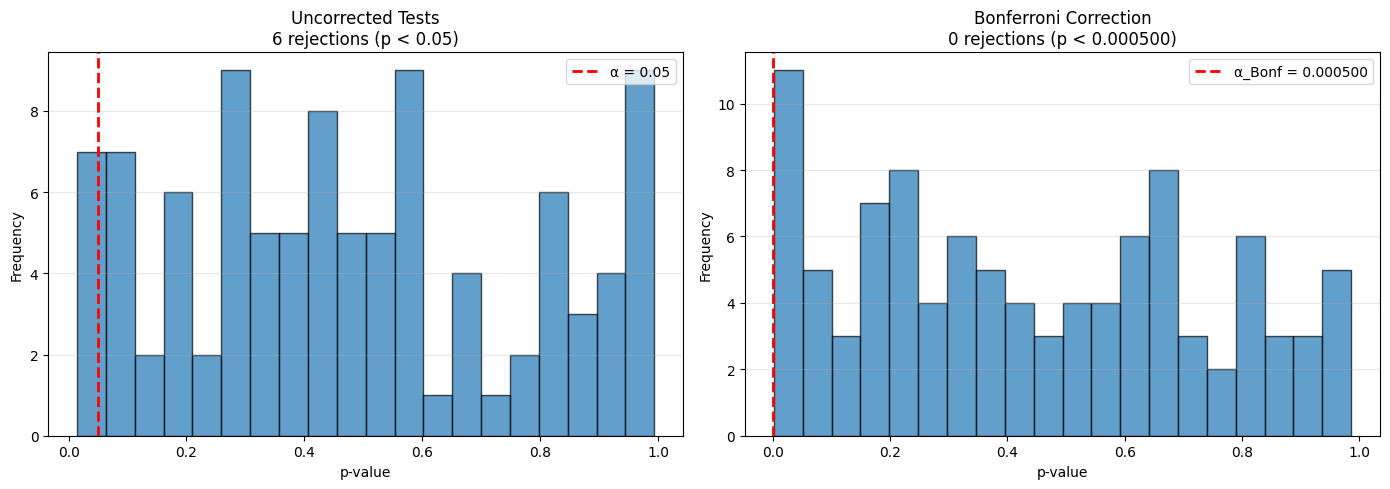

In [17]:
# Visualize comparison of p-values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Uncorrected p-values
ax1.hist(p_values, bins=20, edgecolor='black', alpha=0.7)
ax1.axvline(alpha, color='red', linestyle='--', linewidth=2, label=f'α = {alpha}')
ax1.set_xlabel('p-value')
ax1.set_ylabel('Frequency')
ax1.set_title(f'Uncorrected Tests\n{num_rejections} rejections (p < {alpha})')
ax1.legend()
ax1.grid(alpha=0.3, axis='y')

# Bonferroni corrected
ax2.hist(p_values_bonferroni, bins=20, edgecolor='black', alpha=0.7)
ax2.axvline(alpha_bonferroni, color='red', linestyle='--', linewidth=2, label=f'α_Bonf = {alpha_bonferroni:.6f}')
ax2.set_xlabel('p-value')
ax2.set_ylabel('Frequency')
ax2.set_title(f'Bonferroni Correction\n{num_rejections_bonf} rejections (p < {alpha_bonferroni:.6f})')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()